## Step 1: Import required Libraries

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## STEP 2: Load the Dataset

In [48]:
df = pd.read_csv(r'mall_customers (3).csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## STEP 3 : Data Preprocessing

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [50]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [51]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [52]:
# dropping the 'CustomerID' column as it is not useful for clustering
df.drop('CustomerID', axis=1, inplace=True)

## STEP 4: EDA

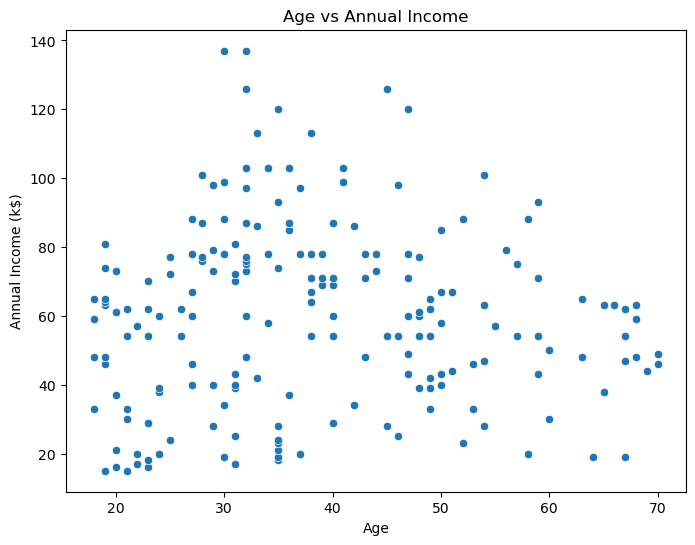

In [53]:
# --- IGNORE ---display age and annual income scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income')
plt.show()

## STEP 5 : Feature Engineering

In [54]:
# display skewness name normal,right skewed ,right skewed,left skewed
def skewness_name(skewness):
    if skewness > 0:
        return "Right Skewed"
    elif skewness < 0:
        return "Left Skewed"
    else:
        return "Normal"
print("Skewness of Age :", skewness_name(df["Age"].skew()))
print("Skewness of Annual Income :", skewness_name(df["Annual Income (k$)"].skew())) 
print("Skewness of Spending Score :", skewness_name(df["Spending Score (1-100)"].skew()))

Skewness of Age : Right Skewed
Skewness of Annual Income : Right Skewed
Skewness of Spending Score : Left Skewed


## STEP 6 : Train the K_MEAN Model

In [56]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df.select_dtypes(include=[np.number]))
df['Cluster'] = kmeans.labels_
df.head()

c:\Users\abhin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\abhin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\abhin\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\abhin\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,2
1,Male,21,15,81,2
2,Female,20,16,6,0
3,Female,23,16,77,2
4,Female,31,17,40,0


c:\Users\abhin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\abhin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\abhin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\abhin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

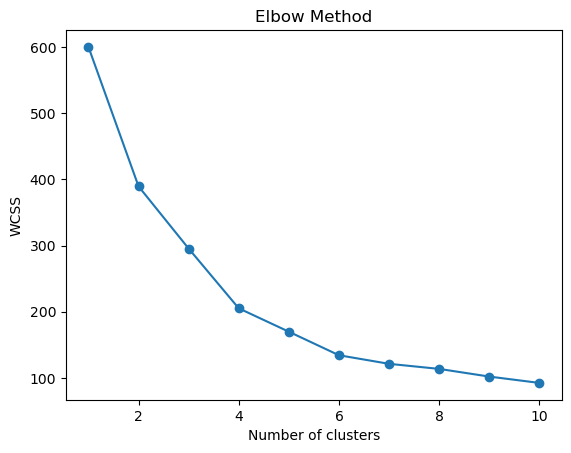

In [61]:
# Prepare scaled_df using StandardScaler and numeric columns only
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('Cluster')
scaled_df = scaler.fit_transform(df[numeric_cols])

#check with ELBow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')     
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0, 0.5, 'Annual Income(k$)')

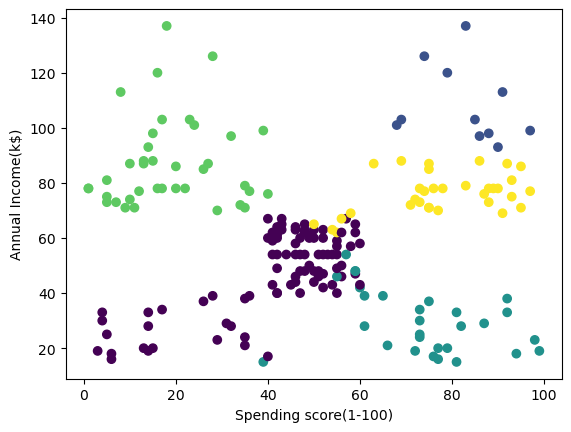

In [68]:
#display clusters 
plt.scatter(df["Spending Score (1-100)"], df["Annual Income (k$)"], c=df["Cluster"])
plt.xlabel('Spending score(1-100)')
plt.ylabel('Annual Income(k$)')

In [69]:
# save the file
df.to_csv('mall_customers_clustered.csv', index=False)